In [1]:
#本章需导入的模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
import matplotlib.cm as cm
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
from sklearn import svm
import sklearn.linear_model as LM
import scipy.stats as st
from scipy.optimize import root,fsolve
from sklearn.feature_selection import  VarianceThreshold,SelectKBest,f_classif,chi2
from sklearn.feature_selection import RFE,RFECV,SelectFromModel
from sklearn.linear_model import Lasso,LassoCV,lasso_path,Ridge,RidgeCV
from sklearn.linear_model import enet_path,ElasticNetCV,ElasticNet

前5个变量的回归系数(alpha=0):[ 0.10647164  0.08368913 -0.04294124  0.00500405 -0.03054124]


Text(0, 0.5, '错判率')

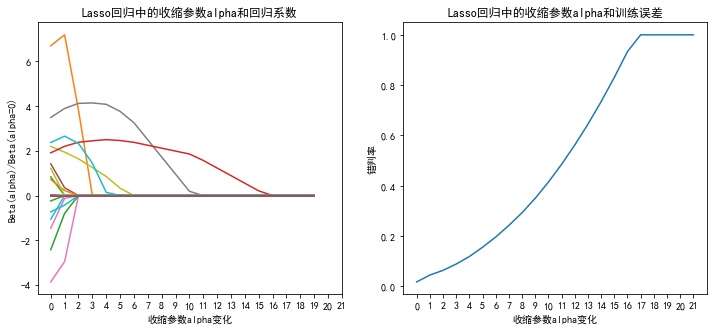

In [2]:
data=pd.read_table('邮政编码数据.txt',sep=' ',header=None)
tmp=data.loc[(data[0]==1) | (data[0]==3)]
X=tmp.iloc[:,1:-1]
Y=tmp.iloc[:,0]
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
alphas=list(np.linspace(0,1,20))
alphas.extend([2,3])
coef=np.zeros((len(alphas),X.shape[1]))
err=[]
for i,alpha in enumerate(alphas):
    modelLasso = Lasso(alpha=alpha)
    modelLasso.fit(X,Y)
    if i==0:
        coef[i]=modelLasso.coef_
    else:
        coef[i]=(modelLasso.coef_/coef[0])
    err.append(1-modelLasso.score(X,Y))    
print('前5个变量的回归系数(alpha=0):%s'%coef[0,][0:5])
for i in np.arange(0,X.shape[1]):
    axes[0].plot(coef[1:-1,i])
axes[0].set_title("Lasso回归中的收缩参数alpha和回归系数")
axes[0].set_xlabel("收缩参数alpha变化")
axes[0].set_xticks(np.arange(len(alphas)))
axes[0].set_ylabel("Beta(alpha)/Beta(alpha=0)")

axes[1].plot(err)
axes[1].set_title("Lasso回归中的收缩参数alpha和训练误差")
axes[1].set_xlabel("收缩参数alpha变化")
axes[1].set_xticks(np.arange(len(alphas)))
axes[1].set_ylabel("错判率")


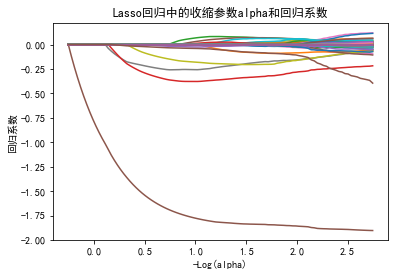

In [3]:
alphas_lasso, coefs_lasso, _ = lasso_path(X, Y)
l1 = plt.plot(-np.log10(alphas_lasso), coefs_lasso.T)
plt.xlabel('-Log(alpha)')
plt.ylabel('回归系数')
plt.title('Lasso回归中的收缩参数alpha和回归系数')
plt.show()

Lasso剔除的变量:159
Lasso的最佳的alpha： 0.0016385673057918155
阈值：1e-05
保留的特征个数：97


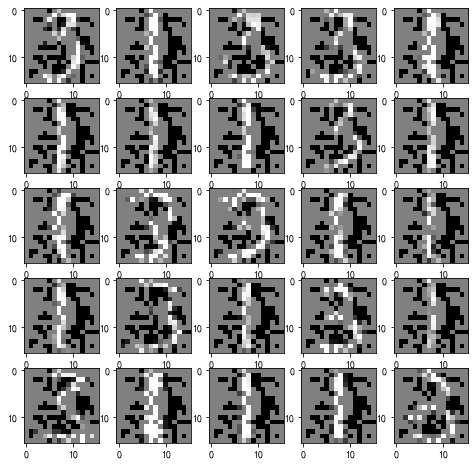

In [4]:
model = LassoCV() #默认采用3-折交叉验证确定的alpha
model.fit(X,Y)
print('Lasso剔除的变量:%d'%sum(model.coef_==0))
print('Lasso的最佳的alpha：',model.alpha_)  # 只有在使用LassoCV有效
lassoAlpha=model.alpha_

estimator = Lasso(alpha=lassoAlpha) 
selector=SelectFromModel(estimator=estimator)
selector.fit(X,Y)
print("阈值：%s"%selector.threshold_)
print("保留的特征个数：%d"%len(selector.get_support(indices=True)))
Xtmp=selector.inverse_transform(selector.transform(X))
plt.figure(figsize=(8,8))
np.random.seed(1)
ids=np.random.choice(len(Y),25)
for i,item in enumerate(ids):
    img=np.array(Xtmp[item,]).reshape((16,16))
    plt.subplot(5,5,i+1)
    plt.imshow(img,cmap=cm.gray)
plt.show()


In [5]:
modelLasso = Lasso(alpha=lassoAlpha)
modelLasso.fit(X,Y)
print("lasso训练误差：%.2f"%(1-modelLasso.score(X,Y)))
modelRidge = RidgeCV()  # RidgeCV自动调节alpha可以实现选择最佳的alpha。
modelRidge.fit(X,Y)
print('岭回归剔除的变量:%d'%sum(modelRidge.coef_==0))
print('岭回归最优alpha：',modelRidge.alpha_)  
print("岭回归训练误差：%.2f"%(1-modelRidge.score(X,Y)))

lasso训练误差：0.02
岭回归剔除的变量:0
岭回归最优alpha： 10.0
岭回归训练误差：0.02
